# Introducción a la biblioteca OpenCV para procesamiento de imágenes
# Jose Fajardo

In [190]:
import numpy as np # Libreria para el manejo de arrays
import cv2   # Opencv
from matplotlib import pyplot as plt # Libreria para graficar
from skimage import io # Libreria para cargar imagenes desde URLs

In [191]:
print(cv2.__version__)

4.4.0


## Uso basico

Primero vamos a cargar la imagen "Lenna", la cual es una de las mas utilizadas para el analisis de imagen y la compresion de estas. 

Por defecto OpenCV carga las imagenes en un espacio de color BGR, intercambiando los canales rojo y azul.

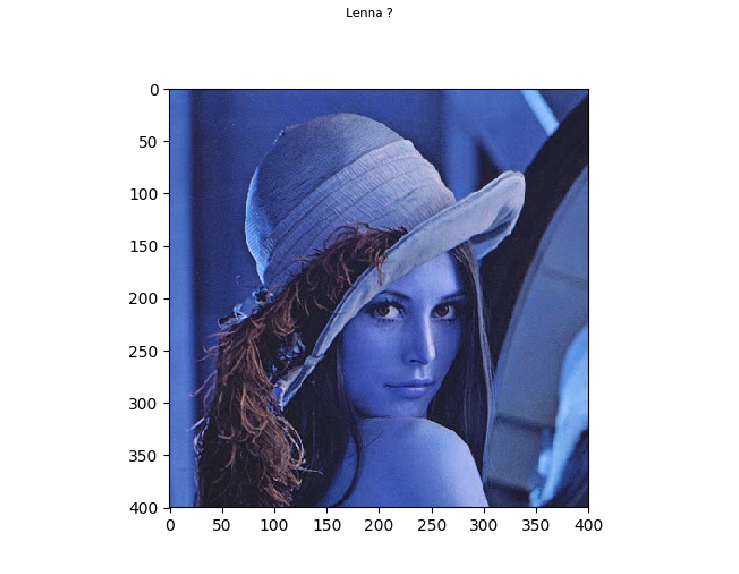

In [192]:
# Cargar la imagen con imread
image = io.imread('https://i.stack.imgur.com/nbdqu.png') # En realidad skimage carga la imagen en RGB

# Graficamos la imagen utilizando matplotlib
plt.figure(figsize=(20,10)) # Cambiamos el tamaño de la imagen
plt.imshow(image)           # Seleccionamos la variable a grafica
plt.title('Lenna ?')
plt.axis('off')             # Quitamos los ejes
plt.show()                  # Finalmente se grafica

## Espacios de color

Para cambiar una imagen de un espacio de color a otro solo es necesario utilizar la funcion **cvtColor**. Esta funcion tiene dos entradas, la primera es la imagen y la segunda es la bandera que nos indicara el espacio de color de origen y el espacio de color deseado.

In [193]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

Debido a que nuestra imagen de origen esta en BGR, revisemos cuales flags se pueden utilizar.

In [194]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_BGR')]
print(flags)

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12', 'COLOR_BGR5552BGR', 'COLOR_BGR5552BGRA', 'COLOR_BGR5552GRAY', 'COLOR_BGR5552RGB', 'COLOR_BGR5552RGBA', 'COLOR_BGR5652BGR', 'COLOR_BGR5652BGRA', 'COLOR_BGR5652GRAY', 'COLOR_BGR5652RGB', 'COLOR_BGR5652RGBA', 'COLOR_BGRA2BGR', 'COLOR_BGRA2BGR555', 'COLOR_BGRA2BGR565', 'COLOR_BGRA2GRAY', 'COLOR_BGRA2RGB', 'COLOR_BGRA2RGBA', 'COLOR_BGRA2YUV_I420', 'COLOR_BGRA2YUV_IYUV', 'COLOR_BGRA2YUV_YV12']


Para cambiar de BGR a RGB utilizaremos la bandera **BGR2RGB**.

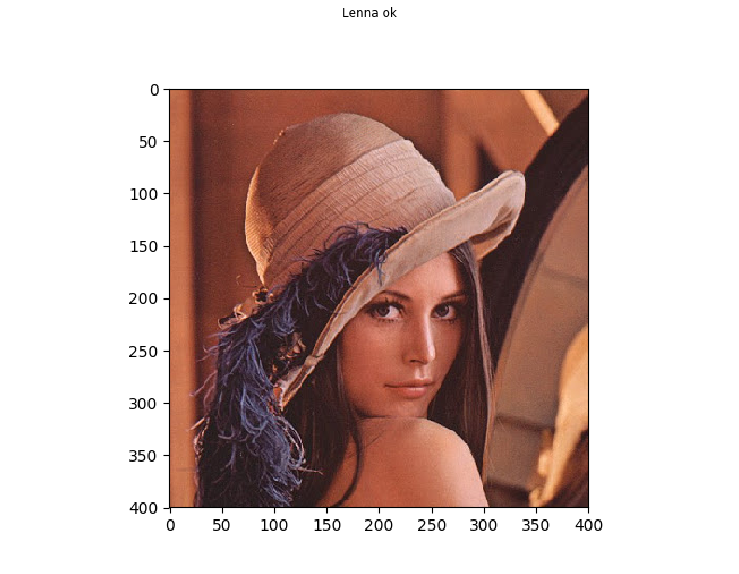

In [195]:
image = io.imread('https://i.stack.imgur.com/nbdqu.png')  

# Por defecto OpenCV carga las imagenes en formato BGR en vez de RGB
# por lo que es necesario realizar un cambio de espacio de imagen
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10)) 
plt.imshow(image)           
plt.title('Lenna ok')
plt.axis('off')             
plt.show()                  

## Segmentacion basada en color

Queremos segmentar los granos de cafe de la siguiente imagen.

<img src="https://morningchores.com/wp-content/uploads/2019/11/Growing-Coffee-Best-Varieties-Planting-Guide-Care-Problems-and-Harvest-FI.jpg" alt="image info" />


Para segmentarla vamos a utilizar el espacio de color HSV.

<img src="https://www.researchgate.net/profile/Wei-Ling-Chen-7/publication/312678134/figure/fig4/AS:523310685736960@1501778398151/HSV-color-space-and-RGB-color-transformation.png"  alt="image info" />

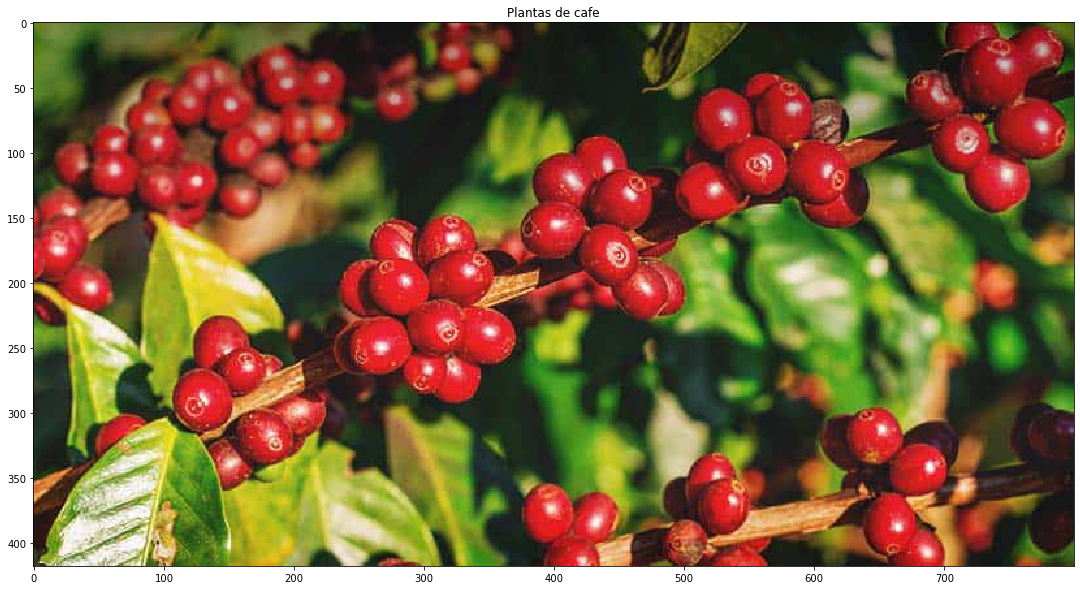

In [196]:
image = io.imread('https://morningchores.com/wp-content/uploads/2019/11/Growing-Coffee-Best-Varieties-Planting-Guide-Care-Problems-and-Harvest-FI.jpg')

plt.figure(figsize=(20,10)) 
plt.imshow(image)           
plt.title('Plantas de cafe')
#plt.axis('off')             
plt.show() 

Para segmentar la imagen simplemente la convertiremos a HSV y seleccionaremos unos rangos adecuados para cada canal. Despues de esto utilizaremos la funcion **inRange** de OpenCV para buscar que regiones de la imagen estan dentro de estos rangos. Con esto obtendremos una imagen que se denomina *mascara* o *mask*, la cual es una imagen binaria (solo tiene valores de 0 o 1) y nos dice que partes de la imagen es de interes.

Debido a que el color que queremos segmentar es el rojo va a ser necesario generar dos mascaras, una que tenga un valor de H desde 0° hasta 15° y otra que vaya desde 330° hasta 360°. Para sumar ambas mascaras utilizaremos la función **add** de OpenCV.

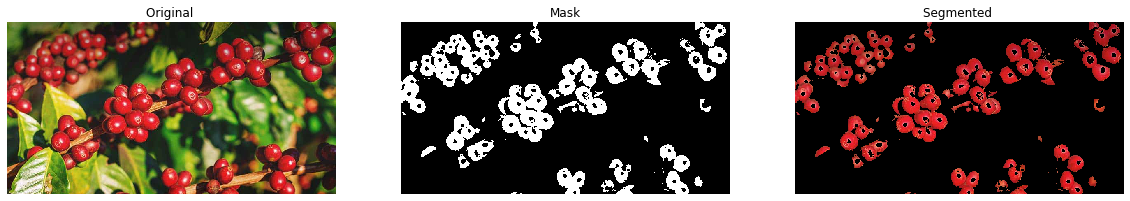

In [197]:
image = io.imread('https://morningchores.com/wp-content/uploads/2019/11/Growing-Coffee-Best-Varieties-Planting-Guide-Care-Problems-and-Harvest-FI.jpg')
image_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) # Convertir la imagen a HSV

# Para umbralizar o segmentar se debe escojer un nivel minimo y un maximo
#           H  S  V
min_val = (0,120,140)
max_val = (7,255,255) # El maximo valor del canal H es 180

image_mask1 = cv2.inRange(image_HSV, min_val, max_val)  # Primera mascara

#           H  S  V
min_val = (165,120,140)
max_val = (180,255,255) # El maximo valor del canal H es 180

image_mask2 = cv2.inRange(image_HSV, min_val, max_val) # Segunda mascara

# Suma de ambas mascaras
image_mask = cv2.add(image_mask1, image_mask2)

#plt.figure(figsize=(20,10)) 
#plt.imshow(image_mask, cmap='gray')           
#plt.title('Mask')
#plt.axis('off')             
#plt.show()  

image_segmented = cv2.bitwise_and(image,image,mask = image_mask)

plt.figure(figsize=(20,15))
plt.subplot(1, 3, 1)
plt.imshow(image)           
plt.title('Original ')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_mask, cmap='gray')           
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_segmented)           
plt.title('Segmented ')
plt.axis('off')

plt.show()

La imagen segmentada se puede obtener multiplicando la imagen original por esta mascara, para realizar esta operación utilizamos la función **bitwise_and**.

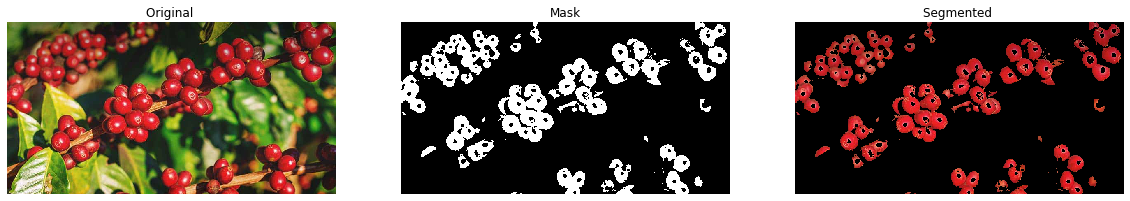

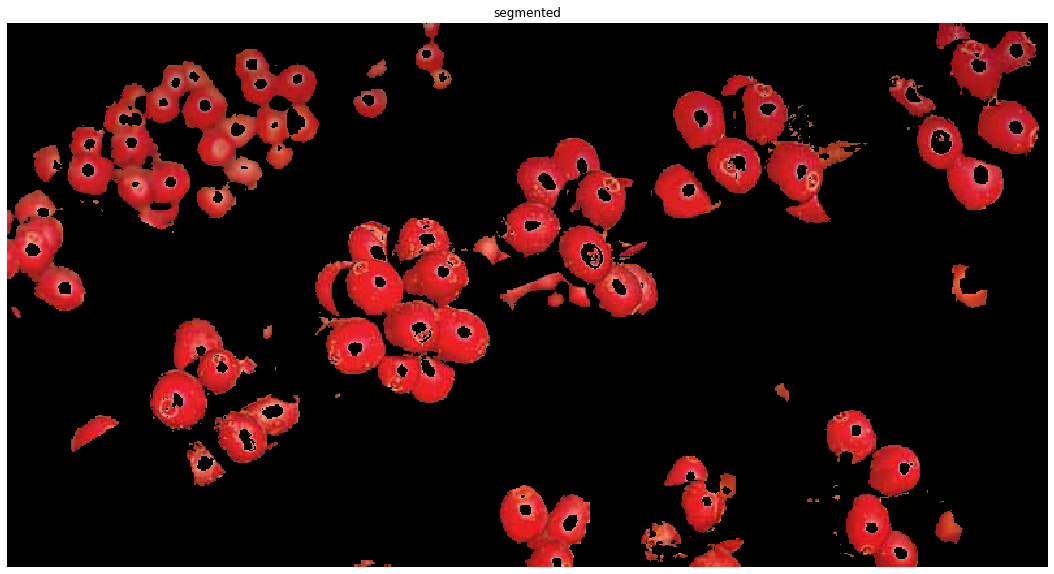

In [198]:
image_segmented = cv2.bitwise_and(image,image,mask = image_mask)

plt.figure(figsize=(20,15))
plt.subplot(1, 3, 1)
plt.imshow(image)           
plt.title('Original ')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_mask, cmap='gray')           
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_segmented)           
plt.title('Segmented ')
plt.axis('off')

plt.show()

plt.figure(figsize=(20,10)) 
plt.imshow(image_segmented)           
plt.title('segmented')
plt.axis('off')             
plt.show()  

## Bounding shapes y Bounding box

Debido a que muchas veces la segmentación en color no otorga los mejores resultados podemos tratar de identificar formas geometricas, llamadas **Bounding shapes** donde se encontraran los objetos. De esta forma aunque ciertas regiones dentro de ellas hayan sido eliminadas se pueden utilizar estas geometricas y muchas veces obtener un mejor resultado.

En este ejemplo deseamos segmentar una pelota de tenis de una imagen tomada en una cancha.

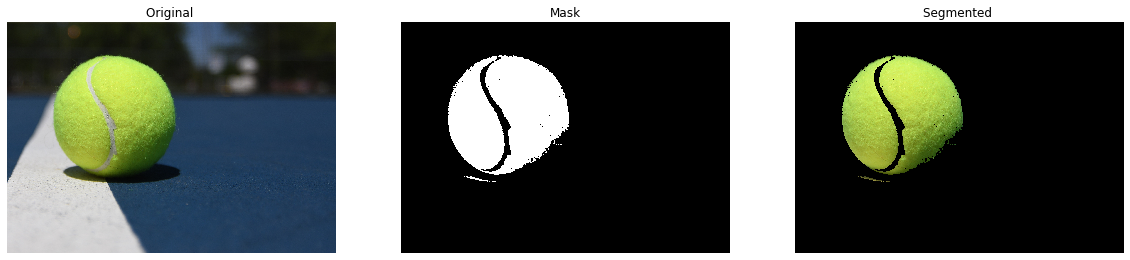

In [199]:
image = cv2.imread('imgs/tennis.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Pasamos la imagen a espacio HSV
image_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Segmentacion
min_val = (27,129,77)
max_val = (67,242,255) 
image_mask = cv2.inRange(image_HSV, min_val, max_val)
image_segmented = cv2.bitwise_and(image,image,mask = image_mask)

plt.figure(figsize=(20,15))
plt.subplot(1, 3, 1)
plt.imshow(image)           
plt.title('Original ')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_mask, cmap='gray')           
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_segmented)           
plt.title('Segmented ')
plt.axis('off')

plt.show()

Cada region de pixeles segmentados (blancos en la mascara) generara una forma geometrica cerrada o *contorno*, debido a que solo nos interesa la pelota de tenis vamos a seleccionar solo los contornos que tengan un area mayor a un valor determinado.

Con el contorno de la pelota de tenis vamos a obtener diferentes bounding shapes, la mas comun es el rectangulo, conocido como **bounding box**, este puede tener sus lados paralelos a los limites de la imagen o puede estar rotado **rotated bounding box**, tambien podemos calcular circulos **bounding circles** o elipses **bounding ellipse**.

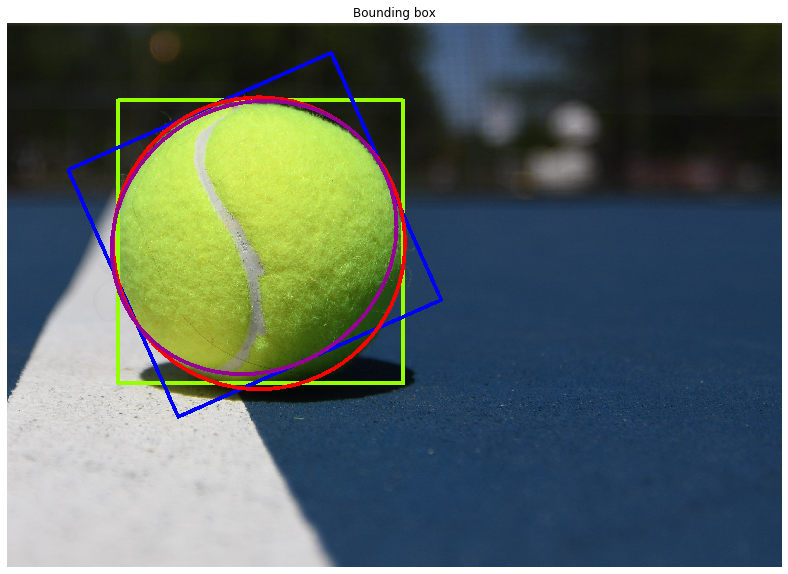

In [200]:
# Para calcular el bounding box es primero necesario hallar los contornos
contours, _ = cv2.findContours(image_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_sel = []

# Se filtran los contornos para solo tener contornos mas grandes a cierta area
thresh_area = 900000.0

for ii in range(len(contours)):
    area = cv2.contourArea(contours[ii])
    if(area>thresh_area):
        contours_sel.append(contours[ii])

#  Se calculan tanto un bounding box como un bounding box rotado, un bounding circle y
#  una bounding ellipse

image = cv2.imread('imgs/tennis.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for ii in range(len(contours_sel)):
    cnt = contours_sel[ii]

    # Bounding box
    x,y,w,h = cv2.boundingRect(cnt) # Se halla el bounding box del contorno
    cv2.rectangle(image,(x,y),(x+w,y+h),(150,255,0),15) # Se dibuja el bbox sobre la imagen

    # Rotated bounding box
    rect = cv2.minAreaRect(cnt) # Se halla el rectangulo minimo que contiene el contorno
    box = cv2.boxPoints(rect)   # Se crea un arreglo con estos puntos
    box = np.int0(box)
    cv2.drawContours(image,[box],0,(0,0,255),15) # Se dibuja sobre la imagen

    # Circle
    (x,y),radius = cv2.minEnclosingCircle(cnt) 
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(image,center,radius,(255,0,0),15)

    # Ellipse
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(image,ellipse,(150,0,150),15)


plt.figure(figsize=(20,10))
plt.imshow(image)           
plt.title('Bounding box')
plt.axis('off')  
plt.show()

Como sabemos que las pelotas de tenis son circulares utilizaremos el **bounding circle** obtenido y tomaremos como imagen segmentada todo lo que se encuentre dentro de el.

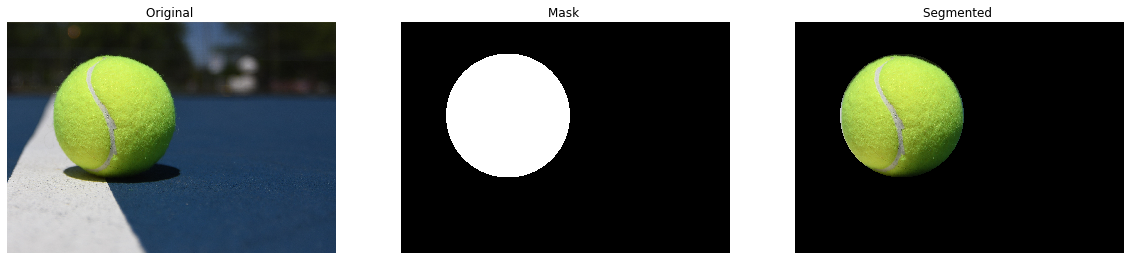

In [201]:
# Tambien es posible obtener una segmentacion con el bounding box
image = cv2.imread('imgs/tennis.jpg') 

# Pasamos la imagen a espacio HSV
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Segmentacion
min_val = (27,129,77)
max_val = (67,242,255)
image_mask = cv2.inRange(image, min_val, max_val)

# Para calcular el bounding box es primero necesario hallar los contornos
contours, _ = cv2.findContours(image_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_sel = []

# Se filtran los contornos para solo tener contornos mas grandes a cierta area
thresh_area = 900000.0

for ii in range(len(contours)):
    area = cv2.contourArea(contours[ii])
    if(area>thresh_area):
        contours_sel.append(contours[ii])

# Se calculan tanto un bounding box como un bounding box rotado, un bounding circle y
#  una bounding ellipse
new_mask = np.zeros((image_mask.shape), dtype=np.uint8)


for ii in range(len(contours_sel)):
    cnt = contours_sel[ii]
    # Circle
    (x,y),radius = cv2.minEnclosingCircle(cnt) 
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(new_mask,center,radius,255,-1)

# Para aplicar una mascara se utiliza la funcion bitwise_and
image = cv2.imread('imgs/tennis.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

new_segmented = cv2.bitwise_and(image,image,mask = new_mask)

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(image)           
plt.title('Original ')
plt.axis('off') 

plt.subplot(1, 3, 2)
plt.imshow(new_mask, cmap='gray')           
plt.title('Mask ')
plt.axis('off') 

plt.subplot(1, 3, 3)
plt.imshow(new_segmented)           
plt.title('Segmented ')
plt.axis('off')

plt.show()

## Feature matching

### Panoramicas o stitching

Para crear panoramicas vamos a obtener los **keypoints** y **features** de dos imágenes correspondientes a lugares espacialmente cercanos, esto lo haremos utilizando el descriptor **ORB**, despues compararemos los features y en caso de hayan suficientes matches transformaremos **( * )** la imagen derecha para poder "coserla" a la imagen izquierda.

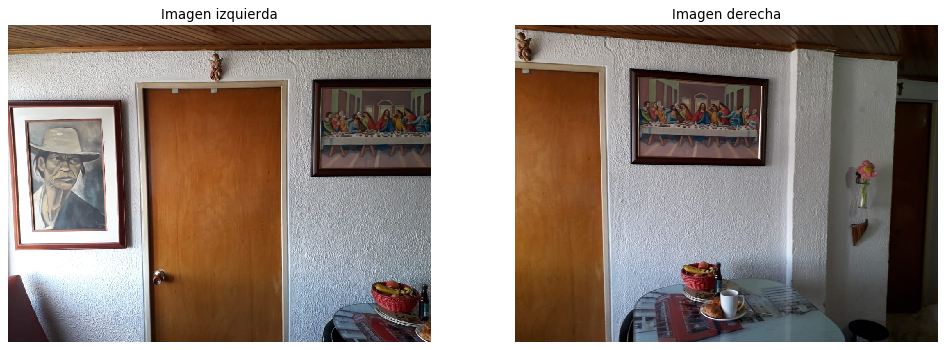

In [202]:
# Cargar ambas imagenes
imgRight = cv2.imread('imgs/RightSala2.jpg')
imgLeft = cv2.imread('imgs/LeftSala.jpg')
imgRight = cv2.cvtColor(imgRight,cv2.COLOR_BGR2RGB)
imgLeft = cv2.cvtColor(imgLeft,cv2.COLOR_BGR2RGB)

# Mostrar ambas imagenes
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1),plt.imshow(imgLeft), plt.title('Imagen izquierda')
plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(imgRight), plt.title('Imagen derecha')
plt.axis('off') 
plt.show()

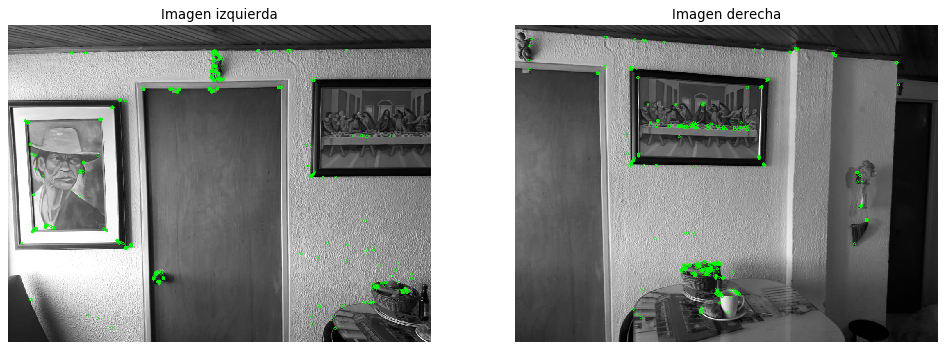

Matches:  102
Matriz de transformacion obtenida usando OpenCV: 
 [[ 9.22734018e-01  4.01376542e-02  4.65330109e+02]
 [-9.25676707e-02  1.02670986e+00  4.78002392e+01]
 [-1.04044333e-04  8.66441194e-05  1.00000000e+00]] 



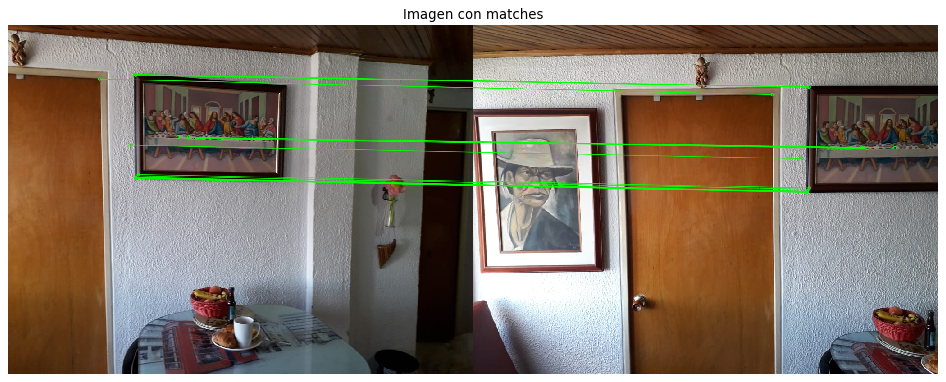

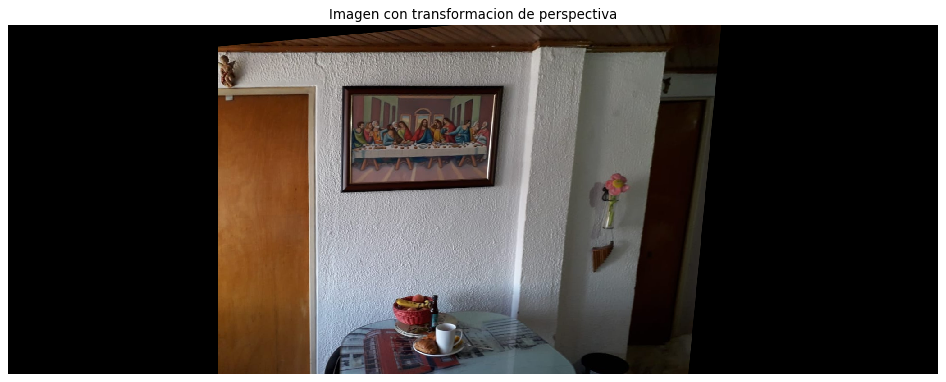

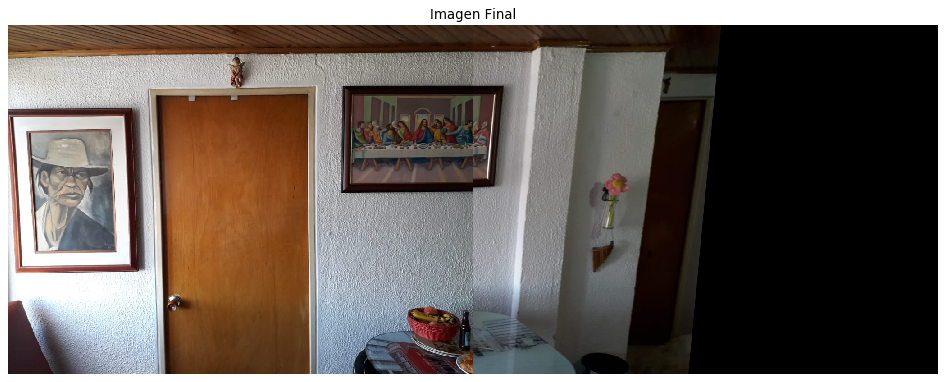

In [203]:
# Cambiar a escala de grises para hallar los keypoints
img1 = cv2.cvtColor(imgRight,cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(imgLeft,cv2.COLOR_RGB2GRAY)

# Se crea el objeto del descriptor
orb = cv2.ORB_create()

# Se calculan los keypoints y las features
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# Se dibujan en la imagen los keypoints hallados
img1_kp_draw = cv2.drawKeypoints(img1.copy(), kp1, None, color=(0,255,0), flags=0)
img2_kp_draw = cv2.drawKeypoints(img2.copy(), kp2, None, color=(0,255,0), flags=0)

plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.imshow(img2_kp_draw)
plt.title('Imagen izquierda')
plt.axis('off') 

plt.subplot(1,2,2)
plt.imshow(img1_kp_draw)
plt.title('Imagen derecha')
plt.axis('off') 
plt.show()

# Crear el objeto para la comparacion de matrices de caracteristicas
# se utiliza el algoritmo de BruteForce
match = cv2.BFMatcher()

# Se comparan los vectores de caracteristicas teniendo en cuenta los dos
# vecinos mas cercanos
matches = match.knnMatch(des1,des2,k=2) 

# Se realiza un recorrido de las parejas de vectores caracteristicas
# para rechazar aquellos que estan demasiado lejos entre si
good = []
FACT_DIST = 0.9
for m,n in matches:
    if m.distance < FACT_DIST*n.distance:
        good.append(m)
        
print("Matches: ", len(good))

# Se organizan de forma que los matches mas parecidos esten al principio
matches_sorted = sorted(good, key = lambda x:x.distance)
        
# Si el numero de parejas de caracteristicas supera un umbral se halla la matriz
# para despues realizar la transformacion de perspectiva
MIN_MATCH_COUNT = 10
M = None
if len(matches_sorted) > MIN_MATCH_COUNT:
    
    # Se hallan los puntos de los descriptores en las parejas en la primera
    # imagen
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches_sorted ]).reshape(-1,1,2) # Source points
    
    # Se hallan los puntos de los descriptores en las parejas en la segunda
    # imagen
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches_sorted ]).reshape(-1,1,2) # Desired points
    
    # Con los anteriores dos arreglos se procede a calcular la matriz de
    # homografia usando la tecnica RANSAC (Random Sample Consensus) debido 
    # a que los puntos en los arreglos tienen coordenadas atipicas (outliers), 
    # es decir que algunos estan muy lejos del resto.
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
else:
    print("Not enought matches are found")

if (M is not None):
    print("Matriz de transformacion obtenida usando OpenCV: \n", M,"\n")
    
    # La mascara es un arreglo en el cual se encuentran los matches aceptados
    matchesMask = mask.ravel().tolist()
    
    # Se dibujan los matches obtenidos
    img_res = cv2.drawMatches(imgRight, kp1, imgLeft, kp2, matches_sorted, None,matchColor = (0,255,0),
               singlePointColor = None,
               matchesMask = matchesMask, # Dibujar solo inliers
               flags = 2)
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img_res), plt.title('Imagen con matches')
    plt.axis('off') 
    plt.show()

    # Se realiza la transformacion de perspectiva
    dst = cv2.warpPerspective(imgRight,M,(imgLeft.shape[1] + imgRight.shape[1], imgLeft.shape[0]))
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(dst), plt.title('Imagen con transformacion de perspectiva')
    plt.axis('off') 
    plt.show()

    # Se cambian los elementos de la izquierda de la imagen final
    # por los de la imagen izquierda para obtener una imagen "panoramica"
    dst[0:imgLeft.shape[0],0:imgLeft.shape[1]] = imgLeft
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(dst), plt.title('Imagen Final')
    plt.axis('off') 
    plt.show()

## Detección de objetos

Para detectar objetos vamos a obtener los **keypoints** y **features** de dos imágenes, una sera la del objeto a detectar y la otra una imagen donde se encuentre el objeto.

Luego compararemos los features y en caso de hayan suficientes matches podemos asegurar que el objeto se encuentra en la imagen y posteriormente podremos identificar en que parte de la imagen se encuentra.

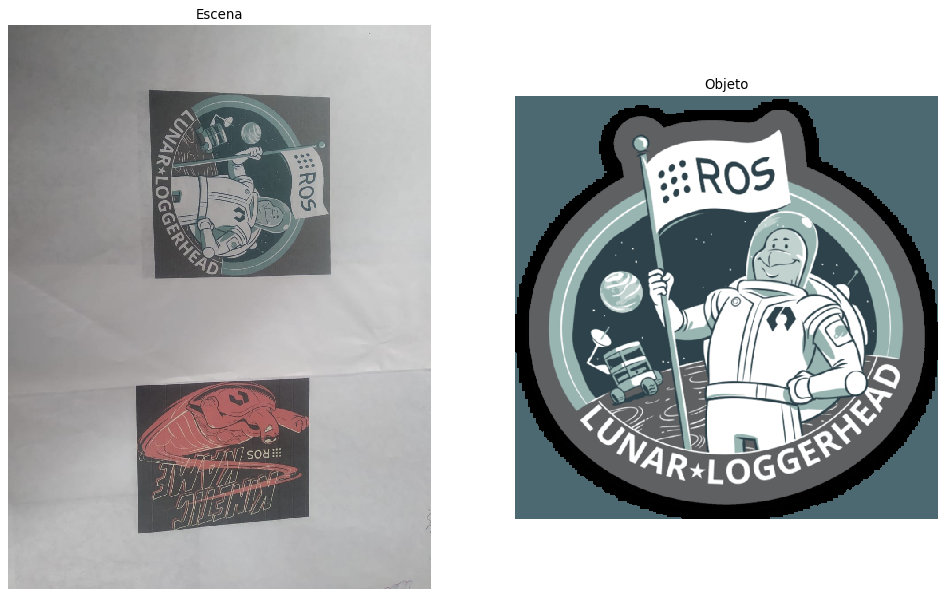

In [204]:
# Cargar ambas imagenes
imgScene  = cv2.imread('imgs/Photo1.jpg')          # Scene
imgObject = cv2.imread('imgs/lunar_sticker.png')   # Object
imgScene  = cv2.cvtColor(imgScene,cv2.COLOR_BGR2RGB)
imgObject = cv2.cvtColor(imgObject,cv2.COLOR_BGR2RGB)

# Mostrar ambas imagenes
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1),plt.imshow(imgScene), plt.title('Escena')
plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(imgObject), plt.title('Objeto')
plt.axis('off') 
plt.show()

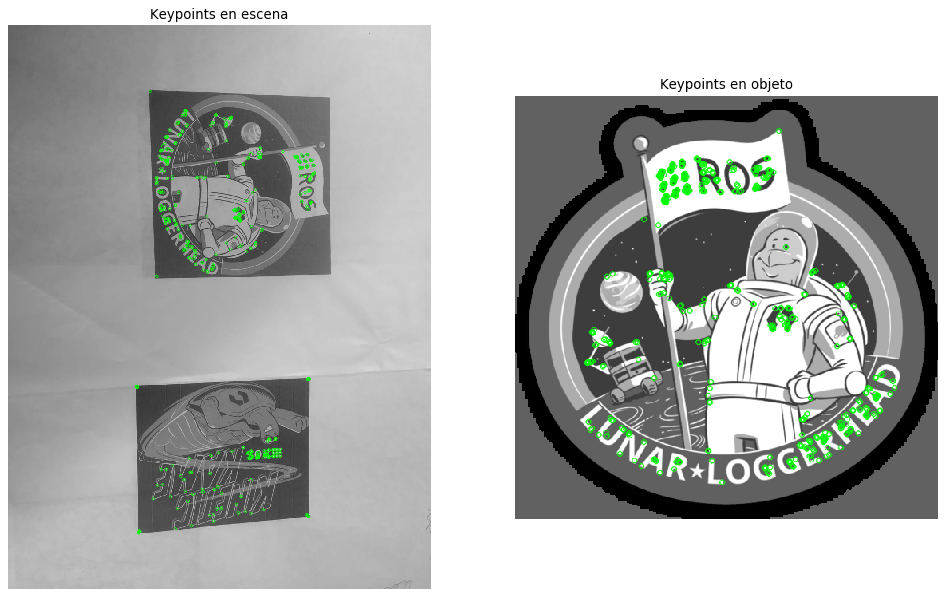

Matches:  145
Matriz de transformacion obtenida usando OpenCV: 
 [[ 5.75726164e-02 -9.45152774e-01  7.62815773e+02]
 [ 9.39079200e-01 -5.86083148e-02  1.28778346e+02]
 [ 8.19870551e-05 -1.37844379e-04  1.00000000e+00]] 



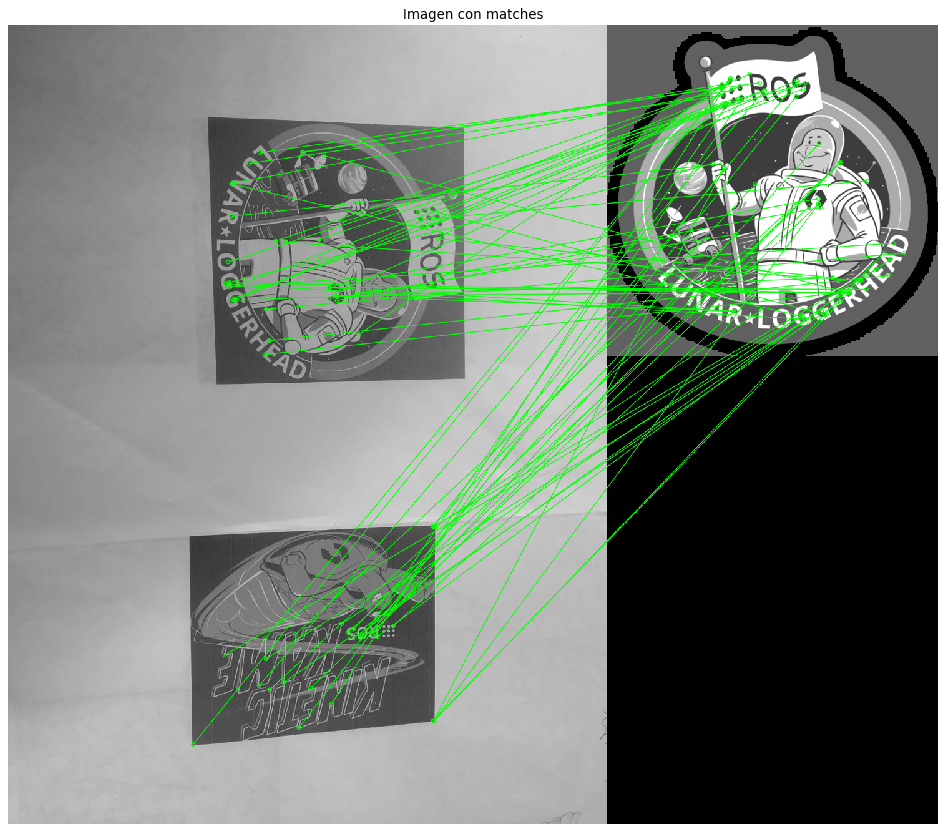

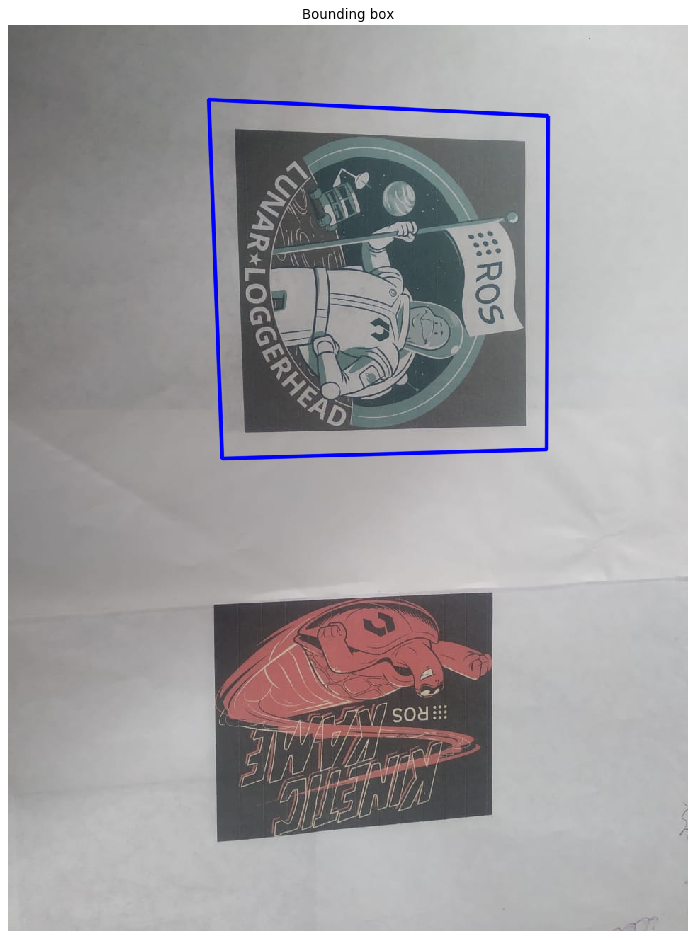

In [205]:
# Cambiar a escala de grises para hallar los keypoints
img1_Scene = cv2.cvtColor(imgScene,cv2.COLOR_RGB2GRAY)
img2_Object = cv2.cvtColor(imgObject,cv2.COLOR_RGB2GRAY)

# Se crea el objeto del descriptor
orb = cv2.ORB_create()

# Se calculan los keypoints y las features
kp1_Scene, des1_Scene = orb.detectAndCompute(img1_Scene,None)
kp2_Object, des2_Object = orb.detectAndCompute(img2_Object,None)

# Se dibujan en la imagen los keypoints hallados
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
img1_kp_draw = cv2.drawKeypoints(img1_Scene.copy(), kp1_Scene, None, color=(0,255,0), flags=0)
plt.subplot(1,2,1),plt.imshow(img1_kp_draw), plt.title('Keypoints en escena')
plt.axis('off')

img2_kp_draw = cv2.drawKeypoints(img2_Object.copy(), kp2_Object, None, color=(0,255,0), flags=0)
plt.subplot(1,2,2),plt.imshow(img2_kp_draw), plt.title('Keypoints en objeto')
plt.axis('off') 
 
plt.show()


# Crear el objeto para la comparacion de matrices de caracteristicas
# se utiliza el algoritmo de BruteForce
matcher = cv2.BFMatcher()

# Se comparan los vectores de caracteristicas teniendo en cuenta los dos
# vecinos mas cercanos
matches = matcher.knnMatch(des2_Object, des1_Scene, k=2) 

# Se realiza un recorrido de las parejas de vectores caracteristicas
# para rechazar aquellos que estan demasiado lejos entre si
good = []
FACT_DIST = 0.9
for m,n in matches:
    if m.distance < FACT_DIST*n.distance:
        good.append(m)
        
print("Matches: ", len(good))

# Se organizan de forma que los matches mas parecidos esten al principio
matches_sorted = sorted(good, key = lambda x:x.distance)

# Si el numero de parejas de caracteristicas supera un umbral se halla la matriz
# para despues realizar la transformacion de perspectiva
MIN_MATCH_COUNT = 10
M = None
if len(matches_sorted) > MIN_MATCH_COUNT:
    
    # Se hallan los puntos de los descriptores en las parejas en el objeto
    src_pts = np.float32([ kp2_Object[m.queryIdx].pt for m in matches_sorted ]).reshape(-1,1,2) # Object points
    
    # Se hallan los puntos de los descriptores en las parejas en la escena
    dst_pts = np.float32([ kp1_Scene[m.trainIdx].pt for m in matches_sorted ]).reshape(-1,1,2) # Desired points
    
    # Con los anteriores dos arreglos se procede a calcular la matriz de
    # homografia usando la tecnica RANSAC (Random Sample Consensus) debido 
    # a que los puntos en los arreglos tienen coordenadas atipicas (outliers), 
    # es decir que algunos estan muy lejos del resto.
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
else:
    print("Not enought matches are found")

if (M is not None):
    print("Matriz de transformacion obtenida usando OpenCV: \n", M,"\n")
    
    # Se hallan puntos para realizar la homografia
    h,w = img2_Object.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    #print("Height: ", h, " Width: ", w, " Points: \n", pts)
    
    # Se realiza la homografia o transformacion de perspectiva
    dst = cv2.perspectiveTransform(pts,M)
    
    # La mascara es un arreglo en el cual se encuentran los matches aceptados
    matchesMask = mask.ravel().tolist()
    
    # Se dibujan los matches obtenidos
    img_res = cv2.drawMatches(img1_Scene, kp1_Scene, img2_Object, kp2_Object, matches_sorted, None,matchColor = (0,255,0),
               singlePointColor = None,
               matchesMask = matchesMask, # Dibujar solo inliers
               flags = 2)
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img_res), plt.title('Imagen con matches')
    plt.axis('off') 
    plt.show()
    
    # Se dibuja el bounding box
    img_box = cv2.polylines(imgScene, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)

    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img_box), plt.title('Bounding box')
    plt.axis('off') 
    plt.show()


## Filtros espaciales

Muchas veces deseamos realzar o disminuir ciertas características de una imagen.
- Bordes
    - Generales (En cualquier dirección)
    - Por dirección
- Esquinas

La manera más fácil es utilizar filtros espaciales. 

<img src="https://boofcv.org/images/9/99/Object_contours.jpg" />

En los filtros espaciales es necesario establecer un **kernel** (matriz de pesos), el cual seleccionará qué características se van a realzar. Con este kernel se realiza una operación de convolución con la imagen.

<img src="https://miro.medium.com/max/700/1*Fw-ehcNBR9byHtho-Rxbtw.gif" />

In [206]:
kernel_Sobel_X = np.array([[-1,  0,  1],
                           [-2,  0,  2],
                           [-1,  0,  1]])

kernel_Sobel_Y = np.array([[-1, -2, -1],
                           [ 0,  0,  0 ],
                           [ 1,  2,  1]])

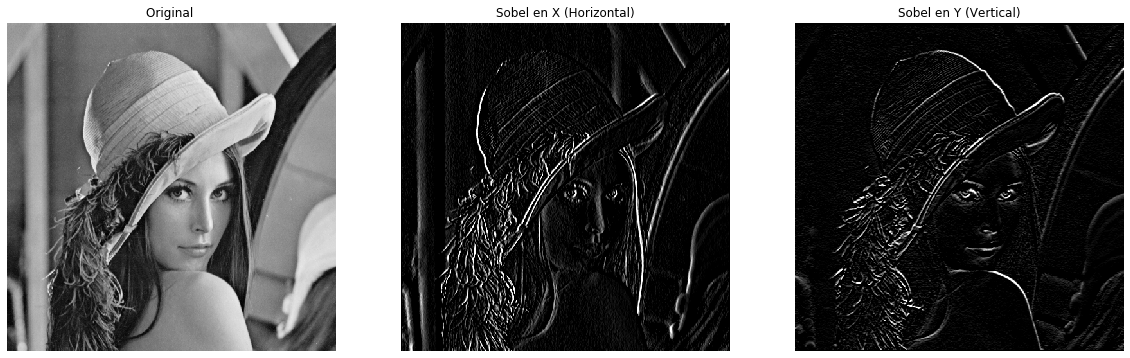

In [207]:
# Cargar Lenna
image = io.imread("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")

# Pasar la imagen a escala de grises
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Se realiza el filtrado de la imagen utilizando ambos kernels
output_Sobel_X = cv2.filter2D(image_gray, -1, kernel_Sobel_X)
output_Sobel_Y= cv2.filter2D(image_gray, -1, kernel_Sobel_Y)

plt.figure(figsize=(20,15))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')           
plt.title('Original ')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output_Sobel_X, cmap='gray')           
plt.title('Sobel en X (Horizontal)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output_Sobel_Y, cmap='gray')           
plt.title('Sobel en Y (Vertical)')
plt.axis('off')

plt.show()